In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

%matplotlib inline

sns.set(style="darkgrid")

# Download data

In [2]:
from astropy.table import Table
dat = Table.read('data/RRLyrae.fit', format='fits')
rr_fit = dat.to_pandas()

In [3]:
from astropy.io import fits
from astropy.table import Table
quasar = pd.DataFrame(np.load("data/dr7_quasar.npy"))

spec = pd.DataFrame(np.load("data/spec4000.npz"))

### Looking at data of quasars

In [4]:
quasar.head()

,sdssID,RA,dec,redshift,mag_u,err_u,mag_g,err_g,mag_r,err_r,...,err_i,mag_z,err_z,mag_J,err_J,mag_H,err_H,mag_K,err_K,specobjid
0,b'000006.53+0030',0.027228,0.515341,1.8246,20.384001,0.065,20.461000,0.034,20.323999,0.038,...,0.041,20.042000,0.121,0.000,0.000,0.0,0.0,0.0,0.0,193034571183292416
1,b'000008.13+0016',0.033900,0.276301,1.8373,20.242001,0.054,20.205999,0.024,19.941000,0.032,...,0.032,19.177999,0.068,17.351,0.291,0.0,0.0,0.0,0.0,193034571195875328
2,b'000009.26+1517',0.038604,15.298477,1.1985,19.916000,0.042,19.806999,0.036,19.374001,0.017,...,0.023,19.312000,0.069,0.000,0.000,0.0,0.0,0.0,0.0,211612125330669568
3,b'000009.38+1356',0.039089,13.938450,2.2342,19.233000,0.026,18.886000,0.022,18.427000,0.018,...,0.024,18.084000,0.033,17.263,0.272,0.0,0.0,0.0,0.0,211330580493631488
4,b'000009.42-1027',0.039271,-10.464426,1.8449,19.242001,0.036,19.018999,0.027,18.966000,0.021,...,0.018,18.705000,0.047,0.000,0.000,0.0,0.0,0.0,0.0,183182688176308224


` Для анализа возьмем данные без ошибки

In [5]:
quasar.columns

Index(['sdssID', 'RA', 'dec', 'redshift', 'mag_u', 'err_u', 'mag_g', 'err_g',
       'mag_r', 'err_r', 'mag_i', 'err_i', 'mag_z', 'err_z', 'mag_J', 'err_J',
       'mag_H', 'err_H', 'mag_K', 'err_K', 'specobjid'],
      dtype='object')

In [6]:
quas = quasar.drop(columns=['err_u', 'err_g', 'err_r', 'err_i', 'err_z', 'err_J', 'err_H', 'err_K', 'sdssID'])

In [7]:
quas.head()

,RA,dec,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,mag_J,mag_H,mag_K,specobjid
0,0.027228,0.515341,1.8246,20.384001,20.461000,20.323999,20.093000,20.042000,0.000,0.0,0.0,193034571183292416
1,0.033900,0.276301,1.8373,20.242001,20.205999,19.941000,19.485001,19.177999,17.351,0.0,0.0,193034571195875328
2,0.038604,15.298477,1.1985,19.916000,19.806999,19.374001,19.148001,19.312000,0.000,0.0,0.0,211612125330669568
3,0.039089,13.938450,2.2342,19.233000,18.886000,18.427000,18.301001,18.084000,17.263,0.0,0.0,211330580493631488
4,0.039271,-10.464426,1.8449,19.242001,19.018999,18.966000,18.775000,18.705000,0.000,0.0,0.0,183182688176308224


`The spectrum with the five filters from the Sloan Digital Sky Survey (SDSS), which are denoted by the letters u (ultraviolet), g (green), r (red), i (infrared), and z (infrared)`

Text(0.5, 1.0, 'Correlation matrix')

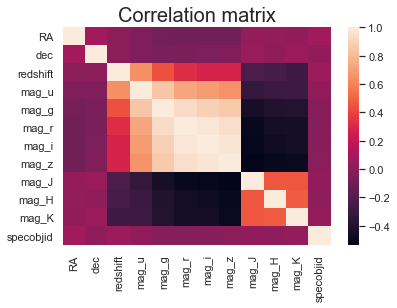

In [8]:
hm = sns.heatmap(quas.corr(),
                 cbar=True,
                 annot=False)
hm.set_title('Correlation matrix', fontsize=20)

` Let's consider two groups of data: filters-redshift and J, H, K columns`

#### SDSS DR7

`How to draw was taken from` [here](https://github.com/astroML/astroML/blob/main/astroML/plotting/multiaxes.py)

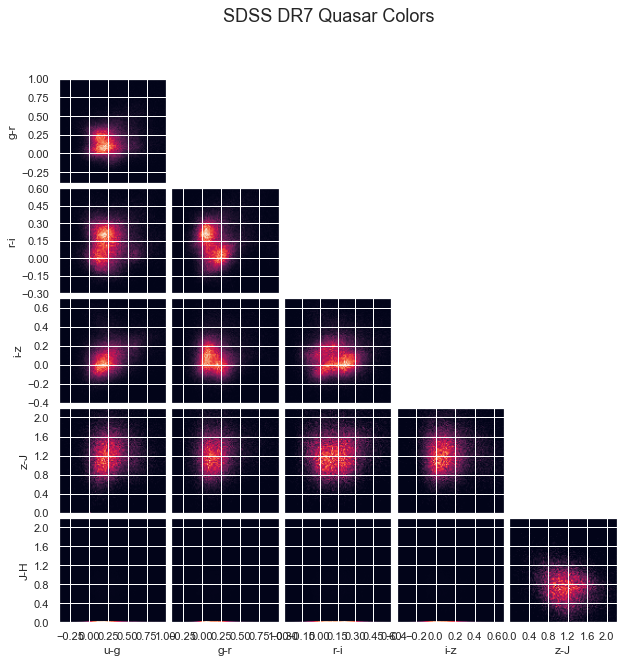

In [9]:
from astroML.plotting import MultiAxes

colors = np.empty((len(quas), 6))

colors[:, 0] = quas['mag_u'] - quas['mag_g']
colors[:, 1] = quas['mag_g'] - quas['mag_r']
colors[:, 2] = quas['mag_r'] - quas['mag_i']
colors[:, 3] = quas['mag_i'] - quas['mag_z']
colors[:, 4] = quas['mag_z'] - quas['mag_J']
colors[:, 5] = quas['mag_J'] - quas['mag_H']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J', 'J-H']

bins = [np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.4, 1.0, 100),
        np.linspace(-0.3, 0.6, 100),
        np.linspace(-0.4, 0.7, 100),
        np.linspace(0, 2.2, 100),
        np.linspace(0, 2.2, 100)]

ax = MultiAxes(6, wspace=0.05, hspace=0.05,
               fig=plt.figure(figsize=(10, 10)))
ax.density(colors, bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(6))
plt.suptitle('SDSS DR7 Quasar Colors', fontsize=18)

plt.show()

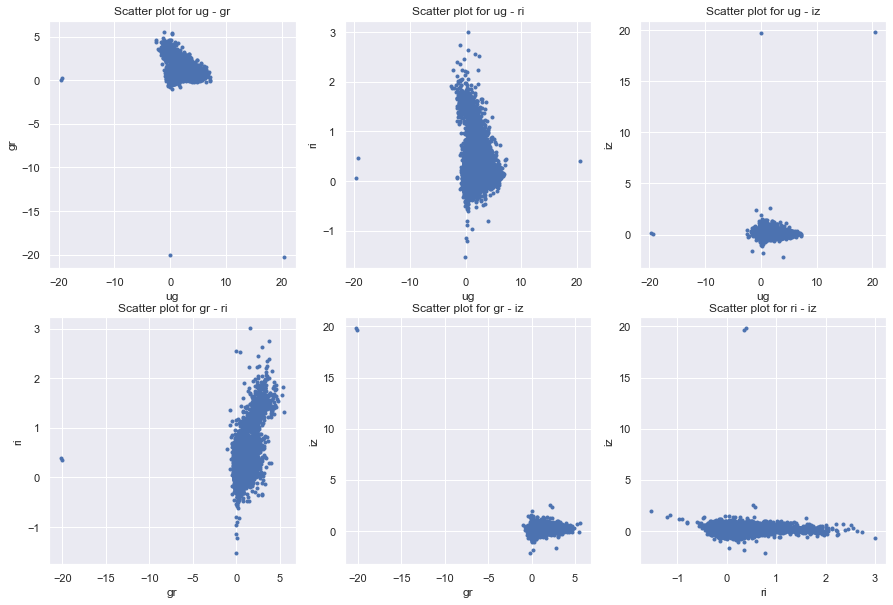

In [11]:
from itertools import combinations as comb
def plot_galaxies_by_color_indices(data, labels, name='Default.png'):
    # 6 for all the possible parings
    plt.figure(figsize=(15,10))
    batch = 1
    for ind, subset in enumerate(comb(labels, 2)):
        subplt = plt.subplot(int("23%d" % (ind + 1)))
        subplt.scatter(data[subset[0]].values[::batch], data[subset[1]].values[::batch],
                       marker='.')
        subplt.set_title("Scatter plot for %s - %s" % (subset[0], subset[1]))
        subplt.set_xlabel("%s" % subset[0])
        subplt.set_ylabel("%s" % subset[1])
    plt.savefig(name)

N = len(quas)
col = np.zeros((N, 4))
col[:, 0] = quas['mag_u'] - quas['mag_g']
col[:, 1] = quas['mag_g'] - quas['mag_r']
col[:, 2] = quas['mag_r'] - quas['mag_i']
col[:, 3] = quas['mag_i'] - quas['mag_z']

model_color_indices = ['ug', 'gr', 'ri', 'iz']
color = pd.DataFrame(col, columns=['ug', 'gr', 'ri', 'iz'])
plot_galaxies_by_color_indices(color, model_color_indices)

#### Star-Quasar Classification

In [12]:
filters = quas.drop(columns=['redshift', 'RA', 'dec', 'mag_J', 'mag_H', 'mag_K', 'specobjid'])
y = quas['redshift'].astype(int)

`let's count the number of quasars and stars`

In [13]:
print('Number of stars:', np.sum(y == 0))
print('Number of quasars:', np.sum(y > 0))

Number of stars: 27620
Number of quasars: 78163


`Let's try to predict a type of object: is it quasar or not? If it is, that means that redshift is more than 0. If it's not, that means that redshift is zero`

In [14]:
filters.head()

,mag_u,mag_g,mag_r,mag_i,mag_z
0,20.384001,20.461000,20.323999,20.093000,20.042000
1,20.242001,20.205999,19.941000,19.485001,19.177999
2,19.916000,19.806999,19.374001,19.148001,19.312000
3,19.233000,18.886000,18.427000,18.301001,18.084000
4,19.242001,19.018999,18.966000,18.775000,18.705000


##### Naive Bayes

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(filters, y, test_size=0.2, random_state=42)

y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [16]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6756156354870728


In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['Stars', 'QSOs']))

              precision    recall  f1-score   support

       Stars       0.38      0.41      0.40      5501
        QSOs       0.79      0.77      0.78     15656

    accuracy                           0.68     21157
   macro avg       0.59      0.59      0.59     21157
weighted avg       0.68      0.68      0.68     21157



`We see that for Gaussian Naive Bayes, our QSO recall is fairly good: we are correctly identifying 77% of all quasars. The precision is better: of the points we label quasars 79% of them are correctly labeled. This low recall leads to an F1-score of 0.78. But, on the other hand, it has worse prediction for stars: only 40% of labelled are predicted as stars. `

`If we take all data (without ID and errors)`

In [18]:
gnb = naive_bayes.GaussianNB()
y1 = (y > 0).astype(int)
gnb.fit(quas, y1)
y_pred = gnb.predict(quas)

print('Accuracy:', accuracy_score(y1, y_pred))

Accuracy: 0.7388994450904209


###### Random Forest Classifier

`Let's try Random Forest classifier`

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8360826204093208


In [20]:
import optuna

def objective(trial):
    param = {
    "max_depth": trial.suggest_int("max_depth", 1, 30),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
    "n_estimators": trial.suggest_int("n_estimators", 10, 100),
    }
    bst = RandomForestClassifier(**param)
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2022-01-08 18:34:21,176] A new study created in memory with name: no-name-b0b7fe31-ce23-4b3a-9f20-e5f4af300ad1
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 18:34:24,025] Trial 3 finished with value: 0.8618424162215815 and parameters: {'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 3, 'n_estimators': 15}. Best is trial 3 with value: 0.8618424162215815.
[I 2022-01-08 18:34:30,544] Trial 6 finished with value: 0.8577775677080871 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4, 'n_estimators': 42}. Best is trial 3 with value: 0.8618424162215815.
[I 2022-01-08 18:34:32,281] Trial 4 finished with value: 0.8715318807014227 and parameters: {'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 3, 'n_estimators': 60}. Best is

[I 2022-01-08 18:35:19,079] Trial 33 finished with value: 0.8678924233114336 and parameters: {'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 6, 'n_estimators': 35}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:35:20,025] Trial 36 finished with value: 0.8674197665075388 and parameters: {'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 6, 'n_estimators': 31}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:35:36,804] Trial 37 finished with value: 0.8716264120622016 and parameters: {'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 1, 'n_estimators': 35}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:35:37,860] Trial 35 finished with value: 0.8707756298151912 and parameters: {'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 6, 'n_estimators': 61}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:35:39,033] Trial 34 finished with value: 0.8674670321879283 and paramet

[I 2022-01-08 18:36:19,732] Trial 68 finished with value: 0.8693103937231177 and parameters: {'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 53}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:36:21,438] Trial 69 finished with value: 0.8706338327740227 and parameters: {'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 53}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:36:22,078] Trial 71 finished with value: 0.8700193789289596 and parameters: {'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 3, 'n_estimators': 48}. Best is trial 31 with value: 0.8717209434229806.
[I 2022-01-08 18:36:22,390] Trial 70 finished with value: 0.8724299286288226 and parameters: {'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_estimators': 51}. Best is trial 70 with value: 0.8724299286288226.
[I 2022-01-08 18:36:22,796] Trial 73 finished with value: 0.8707756298151912 and paramet

In [21]:
clf = RandomForestClassifier(**study.best_params)
clf.fit(X_train, y_train)
print("Test score:", accuracy_score(y_test, clf.predict(X_test)))

Test score: 0.8726662570307699


In [22]:
study.best_params

{'max_depth': 27,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'n_estimators': 69}

In [23]:
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=['Stars', 'QSOs']))

              precision    recall  f1-score   support

       Stars       0.82      0.66      0.73      5501
        QSOs       0.89      0.95      0.92     15656

    accuracy                           0.87     21157
   macro avg       0.85      0.80      0.82     21157
weighted avg       0.87      0.87      0.87     21157



`So, here we can see, that prediction is good, but physically more correctly way is to measure in the color index:`
$$ CI_{AB} = m_A - m_B$$

In [24]:
y2 = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(col, y2, test_size=0.2, random_state=42)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2022-01-08 18:37:29,204] A new study created in memory with name: no-name-91bf3aa3-6167-4647-ba03-84b232626a92
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 18:37:33,964] Trial 2 finished with value: 0.8506877156496668 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 38}. Best is trial 2 with value: 0.8506877156496668.
[I 2022-01-08 18:37:34,483] Trial 5 finished with value: 0.8712482866190859 and parameters: {'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_estimators': 24}. Best is trial 5 with value: 0.8712482866190859.
[I 2022-01-08 18:37:36,978] Trial 7 finished with value: 0.7432055584440138 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 5, 'n_estimators': 91}. Best is t

[I 2022-01-08 18:38:42,932] Trial 32 finished with value: 0.8741314931228436 and parameters: {'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 4, 'n_estimators': 75}. Best is trial 32 with value: 0.8741314931228436.
[I 2022-01-08 18:38:50,314] Trial 34 finished with value: 0.8737061019993383 and parameters: {'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'n_estimators': 73}. Best is trial 32 with value: 0.8741314931228436.
[I 2022-01-08 18:38:55,268] Trial 35 finished with value: 0.8739424304012856 and parameters: {'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 6, 'n_estimators': 92}. Best is trial 32 with value: 0.8741314931228436.
[I 2022-01-08 18:38:56,039] Trial 36 finished with value: 0.873469773597391 and parameters: {'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 6, 'n_estimators': 91}. Best is trial 32 with value: 0.8741314931228436.
[I 2022-01-08 18:38:58,440] Trial 39 finished with value: 0.873280710875833 and parameter

[I 2022-01-08 18:40:12,848] Trial 68 finished with value: 0.8730443824738857 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 58}. Best is trial 38 with value: 0.8746041499267382.
[I 2022-01-08 18:40:18,067] Trial 72 finished with value: 0.8726189913503805 and parameters: {'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 42}. Best is trial 38 with value: 0.8746041499267382.
[I 2022-01-08 18:40:19,109] Trial 69 finished with value: 0.873469773597391 and parameters: {'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 80}. Best is trial 38 with value: 0.8746041499267382.
[I 2022-01-08 18:40:21,031] Trial 74 finished with value: 0.8738478990405066 and parameters: {'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5, 'n_estimators': 39}. Best is trial 38 with value: 0.8746041499267382.
[I 2022-01-08 18:40:23,934] Trial 70 finished with value: 0.8729971167934962 and paramete

In [25]:
clf = RandomForestClassifier(**study.best_params)
clf.fit(X_train, y_train)
print("Test score:", accuracy_score(y_test, clf.predict(X_test)))
study.best_params

Test score: 0.8735643049581698


{'max_depth': 18,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'n_estimators': 90}

In [26]:
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=['Stars', 'QSOs']))

              precision    recall  f1-score   support

       Stars       0.80      0.69      0.74      5501
        QSOs       0.90      0.94      0.92     15656

    accuracy                           0.87     21157
   macro avg       0.85      0.81      0.83     21157
weighted avg       0.87      0.87      0.87     21157



`As we can see, prediction for quasars improved, but for stars it remained at the same level`

### Prediction of redshift

` Let's consider onle the first group from correlation matrix. From this data we can predict a value of redshift`

#### Decision Tree Regression

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

y = quas['redshift'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(col, y, train_size=0.8, random_state=1)

def objective_reg1(trial):
    param = {
    "max_depth": trial.suggest_int("max_depth", 1, 30),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
    }
    bst = DecisionTreeRegressor(**param)
    bst.fit(x_train, y_train)
    y_pred = bst.predict(x_test)
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction="minimize")
study.optimize(objective_reg1, n_trials=100, n_jobs=-1)

[I 2022-01-08 19:39:02,856] A new study created in memory with name: no-name-22514457-bdc4-4dd4-bdb2-00cfd94b8ffe
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 19:39:03,318] Trial 3 finished with value: 0.2153709451322917 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.2153709451322917.
[I 2022-01-08 19:39:03,342] Trial 2 finished with value: 0.20708558054497453 and parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.20708558054497453.
[I 2022-01-08 19:39:03,398] Trial 1 finished with value: 0.1979225278811205 and parameters: {'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.1979225278811205.
[I 2022-01-08 19:3

[I 2022-01-08 19:39:07,282] Trial 36 finished with value: 0.1937584303898838 and parameters: {'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 36 with value: 0.1937584303898838.
[I 2022-01-08 19:39:07,331] Trial 37 finished with value: 0.1937584303898838 and parameters: {'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 36 with value: 0.1937584303898838.
[I 2022-01-08 19:39:07,523] Trial 38 finished with value: 0.19212158479904434 and parameters: {'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 38 with value: 0.19212158479904434.
[I 2022-01-08 19:39:07,571] Trial 39 finished with value: 0.1937584303898838 and parameters: {'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 38 with value: 0.19212158479904434.
[I 2022-01-08 19:39:07,635] Trial 41 finished with value: 0.20556100850617834 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best i

[I 2022-01-08 19:39:10,727] Trial 73 finished with value: 0.20307539919190087 and parameters: {'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.19006805599633764.
[I 2022-01-08 19:39:10,775] Trial 74 finished with value: 0.20307684028217365 and parameters: {'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.19006805599633764.
[I 2022-01-08 19:39:10,807] Trial 77 finished with value: 0.19277908612291225 and parameters: {'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.19006805599633764.
[I 2022-01-08 19:39:10,855] Trial 75 finished with value: 0.20307539919190087 and parameters: {'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 54 with value: 0.19006805599633764.
[I 2022-01-08 19:39:10,903] Trial 76 finished with value: 0.20307684028217365 and parameters: {'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6}. 

In [129]:
forest = DecisionTreeRegressor(**study.best_params)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print("Test score:", mean_squared_error(y_test, y_pred))
study.best_params

Test score: 0.19006805599633764


{'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 6}

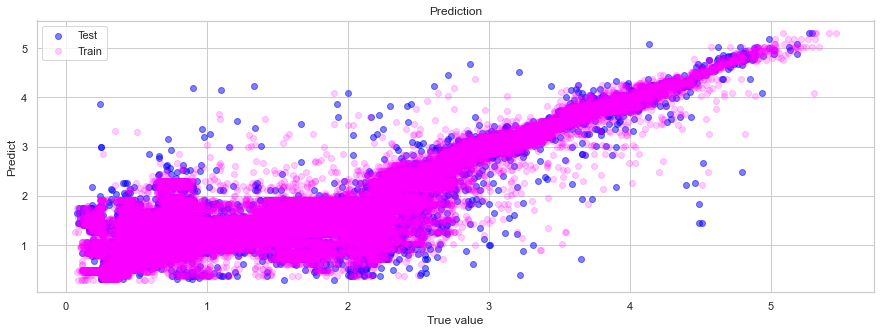

In [130]:
y_pred = forest.predict(x_test)
y_predict_train = forest.predict(x_train)

plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Test')
plt.scatter(y_train, y_predict_train, color='magenta', alpha=0.2, label='Train')
plt.xlabel("True value")
plt.ylabel("Predict")
plt.title("Prediction")
plt.legend()
plt.show()

In [32]:
print(len(y_test))
print(np.sum(abs(y_test - y_pred) > 1))
1197/21157

21157
1197


0.05657701942619464

`About 0.05% of objects have redshift estimates which are off by greater than 1.`

##### Random Forest Regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor

def objective_reg(trial):
    param = {
    "max_depth": trial.suggest_int("max_depth", 1, 30),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
    "n_estimators": trial.suggest_int("n_estimators", 100, 100),
    }
    bst = RandomForestRegressor(**param)
    bst.fit(x_train, y_train)
    y_pred = bst.predict(x_test)
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction="minimize")
study.optimize(objective_reg, n_trials=100, n_jobs=-1)

[I 2022-01-08 19:39:27,501] A new study created in memory with name: no-name-48be67ef-c79b-464b-a3b7-402f40279145
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 19:39:35,938] Trial 3 finished with value: 0.31763066984718635 and parameters: {'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 4, 'n_estimators': 100}. Best is trial 3 with value: 0.31763066984718635.
[I 2022-01-08 19:39:44,921] Trial 5 finished with value: 0.20187247332154143 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'n_estimators': 100}. Best is trial 5 with value: 0.20187247332154143.
[I 2022-01-08 19:39:47,960] Trial 2 finished with value: 0.18277512141549548 and parameters: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'n_estimators': 100}. B

[I 2022-01-08 19:42:29,348] Trial 33 finished with value: 0.16930415010564528 and parameters: {'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 4, 'n_estimators': 100}. Best is trial 19 with value: 0.16795802382533626.
[I 2022-01-08 19:42:37,740] Trial 34 finished with value: 0.16966211757715427 and parameters: {'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_estimators': 100}. Best is trial 19 with value: 0.16795802382533626.
[I 2022-01-08 19:42:40,353] Trial 35 finished with value: 0.16961831084168216 and parameters: {'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2, 'n_estimators': 100}. Best is trial 19 with value: 0.16795802382533626.
[I 2022-01-08 19:42:45,541] Trial 36 finished with value: 0.1689489866195312 and parameters: {'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 4, 'n_estimators': 100}. Best is trial 19 with value: 0.16795802382533626.
[I 2022-01-08 19:42:50,298] Trial 37 finished with value: 0.16828973870252578

[I 2022-01-08 19:45:42,865] Trial 67 finished with value: 0.16834696286882034 and parameters: {'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 6, 'n_estimators': 100}. Best is trial 62 with value: 0.1678366135285116.
[I 2022-01-08 19:45:45,165] Trial 68 finished with value: 0.16838323094915889 and parameters: {'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 6, 'n_estimators': 100}. Best is trial 62 with value: 0.1678366135285116.
[I 2022-01-08 19:45:51,922] Trial 69 finished with value: 0.1677871988229163 and parameters: {'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 6, 'n_estimators': 100}. Best is trial 69 with value: 0.1677871988229163.
[I 2022-01-08 19:45:53,581] Trial 70 finished with value: 0.16786471099631242 and parameters: {'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 6, 'n_estimators': 100}. Best is trial 69 with value: 0.1677871988229163.
[I 2022-01-08 19:46:11,395] Trial 71 finished with value: 0.16779371481278443 and

In [ ]:
forest = RandomForestRegressor(**study.best_params)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print("Test score:", mean_squared_error(y_test, y_pred))
study.best_params

In [ ]:
y_pred = forest.predict(x_test)
y_predict_train = forest.predict(x_train)

plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Test')
plt.scatter(y_train, y_predict_train, color='magenta', alpha=0.2, label='Train')
plt.xlabel("True value")
plt.ylabel("Predict")
plt.title("Prediction")
plt.legend()
plt.show()

In [36]:
print(len(y_test))
print(np.sum(abs(y_test - y_pred) > 1))

21157
1007


`About 0.5% of objects have redshift estimates which are off by greater than 1. If we compare it with desicion tree regressor we can see, than it has 10 times larger value, so for high-precision cosmological studies first metod is better.`

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

Text(0, 0.5, 'error')

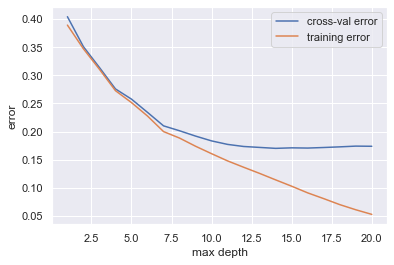

In [38]:
import os, sys
import pylab as pl

max_depth_array = []
train_error = []
cv_error = []

#{{{ compute the arrays max_depth_array, train_error, and cv_error
max_depth_array = np.arange(1, 21)
train_error = np.zeros(max_depth_array.shape)
cv_error = np.zeros(max_depth_array.shape)

for i, max_depth in enumerate(max_depth_array):
    # print progress update
    sys.stdout.write('  %i / %i\r' % (max_depth, max_depth_array[-1]))
    sys.stdout.flush()

    clf = RandomForestRegressor(100, max_depth=max_depth)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_cv_pred = clf.predict(x_valid)

    train_error[i] = mean_squared_error(y_train_pred, y_train)
    cv_error[i] = mean_squared_error(y_cv_pred, y_valid)
#}}}

pl.figure()
pl.plot(max_depth_array, cv_error, label='cross-val error')
pl.plot(max_depth_array, train_error, label='training error')

pl.legend()
pl.xlabel('max depth')
pl.ylabel('error')

`As a result we have `
1. rmse = 0.16, but a mistake (dz > 1) in 0.5% cases 
2. rmse = 0.19 and a mistake (dz > 1) in 0.05% cases

`So, which method to choose depends on the purpose of the task.`

### SDSS Spectral Data

In [39]:
spec = np.load("data/spec4000.npz")
for name in spec.files:
    print(name, spec[name].shape)

evals (1000,)
log_NII_Ha (4000,)
log_OIII_Hb (4000,)
lineindex_cln (4000,)
spectra (4000, 1000)
mask (4000, 1000)
evecs (1000, 1000)
zerr (4000,)
mu (1000,)
norms (4000,)
spec_cln (4000,)
coeffs (4000, 10)
coeff1 ()
coeff0 ()
z (4000,)


`We need to correct spectra. Let's take the algoritn from` [here](https://github.com/astroML/astroML/blob/main/astroML/datasets/sdss_corrected_spectra.py)

In [40]:
def reconstruct_spectra(data):
    """Compute the reconstructed spectra.
    Parameters
    ----------
    data: NpzFile
        numpy data object returned by fetch_sdss_corrected_spectra.
    Returns
    -------
    spec_recons: ndarray
        Reconstructed spectra, using principal components to interpolate
        across the masked region.
    """
    spectra = data['spectra']
    coeffs = data['coeffs']
    evecs = data['evecs']
    mask = data['mask']
    mu = data['mu']
    norms = data['norms']

    spec_recons = spectra.copy()

    nev = coeffs.shape[1]

    spec_fill = mu + np.dot(coeffs, evecs[:nev])
    spec_fill *= norms[:, np.newaxis]

    spec_recons[mask] = spec_fill[mask]

    return spec_recons


def compute_wavelengths(data):
    """Compute the wavelength associated with spectra.
    Paramters
    ---------
    Parameters
    ----------
    data: NpzFile
        numpy data object returned by fetch_sdss_corrected_spectra.
    Returns
    -------
    wavelength: ndarray
        One-dimensional wavelength array for spectra.
    """

    return 10 ** (data['coeff0']
                  + data['coeff1'] * np.arange(data['spectra'].shape[1]))

In [41]:
spectr = reconstruct_spectra(spec)
wav = compute_wavelengths(spec)
print(spectr.shape)

(4000, 1000)


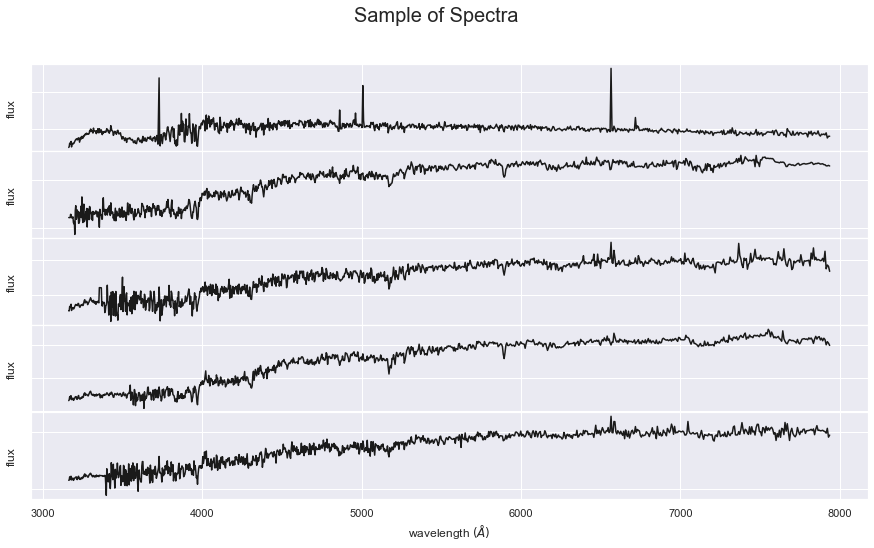

In [42]:
fig = plt.figure(figsize=(15, 8))

fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(wav, spectr[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')
    
fig.suptitle('Sample of Spectra', fontsize=20)
plt.show()

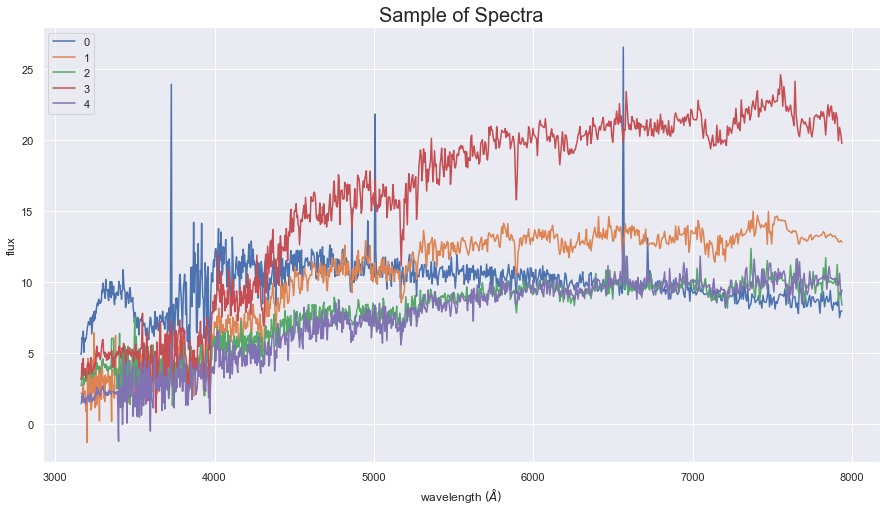

In [43]:
plt.figure(figsize=(15, 8))

for i in range(5):
    plt.plot(wav, spectr[i], '-', label = i)
    plt.ylabel('flux')
plt.legend()
plt.xlabel(r'wavelength $(\AA)$')
plt.ylabel('flux')
plt.title('Sample of Spectra', fontsize=20)
plt.show()

###### The mean and standard deviation of the normalized spectra

Text(0.5, 1.0, 'Mean Spectrum')

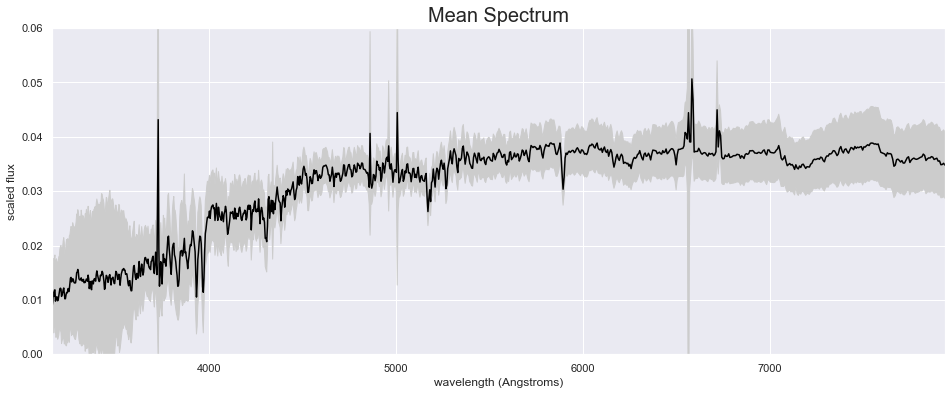

In [44]:
from sklearn import preprocessing
X = preprocessing.normalize(spectr)
mu = X.mean(0)
std = X.std(0)
plt.figure(figsize=(16,6))
plt.plot(wav, mu, color='black')
plt.fill_between(wav, mu - std, mu + std, color='#CCCCCC')
plt.xlim(wav[0], wav[-1])
plt.ylim(0, 0.06)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux')
plt.title('Mean Spectrum', fontsize=20)

###### PCA

In [45]:
from sklearn.decomposition import PCA as RandomizedPCA
rpca = RandomizedPCA(n_components=4, random_state=42)
X_proj = rpca.fit_transform(X)
X_proj.shape

(4000, 4)

Text(0.5, 1.0, 'Mean Spectrum and Eigen-spectra')

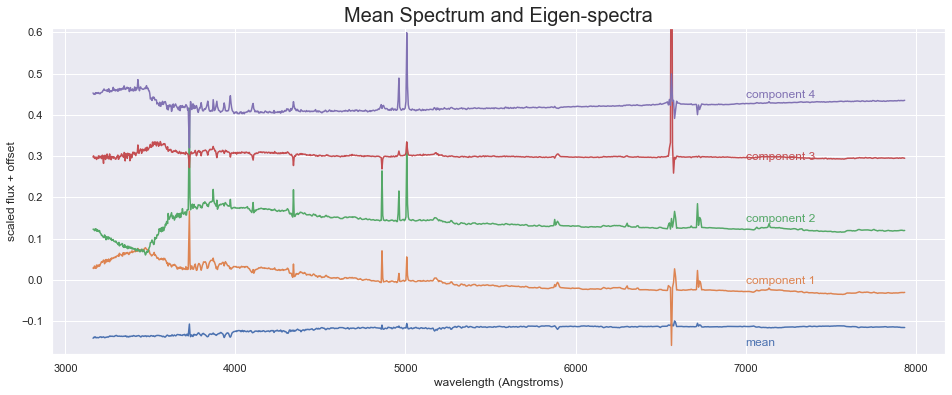

In [46]:
plt.figure(figsize=(16, 6))
l = plt.plot(wav, rpca.mean_ - 0.15)
c = l[0].get_color()
plt.text(7000,  -0.16, 'mean', color=c)

for i in range(4):
    l = plt.plot(wav, rpca.components_[i] + 0.15 * i)
    c = l[0].get_color()
    plt.text(7000, -0.01 + 0.15 * i, "component %i" % (i + 1), color=c)
plt.ylim(-0.18, 0.61)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean Spectrum and Eigen-spectra', fontsize=20)

`We see that the first eigenspectrum (component 1) tells us about the relative difference in flux between low wavelengths and high wavelengths - that is, the color of the spectrum. Component 2 tells us a lot about the emission and absorption characteristics in the various lines, and also in the so-called “4000 angstrom break” due to Hydrogen absorption.`

`Information taken from` [here](https://arxiv.org/abs/astro-ph/0408578) `and` [here](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html#id2)

###### How the reconstruction improves by adding more components.

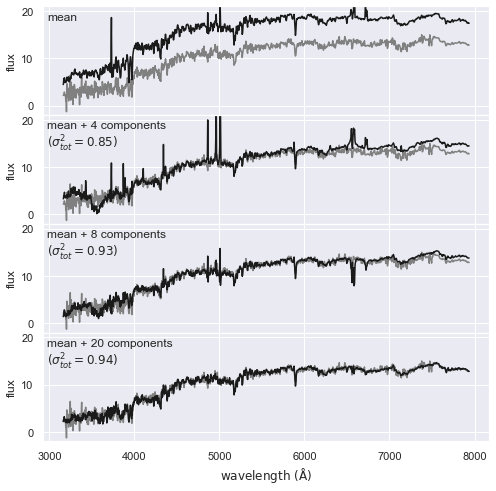

In [47]:
#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = spec['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = spec['evecs']
spec_mean = spectr.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectr[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wav, spec, '-', c='gray')
    ax.plot(wav, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.01, 0.95, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

###### PCA projection of Spectra

In [48]:
# Modified from : https://github.com/astroML/astroML/blob/master/astroML/plotting/tools.py
from scipy import interpolate
from matplotlib.colors import LinearSegmentedColormap

def discretize_cmap(cmap, N):
    """

    Parameters
    ----------
        cmap: colormap instance, eg. cm.jet.
        N: Number of colors.

    Returns
    -------
        cmap_d: discretized colormap

    Example
    -------
        >>> x = resize(arange(100), (5,100))
        >>> djet = cmap_discretize(cm.jet, 5)
    """

    cdict = cmap._segmentdata.copy()
    # N colors
    colors_i = np.linspace(0, 1., N)
    # N+1 indices
    indices = np.linspace(0, 1., N + 1)
    for key in ('red', 'green', 'blue'):
        # Find the N colors
        D = np.array(cdict[key])
        I = interpolate.interp1d(D[:, 0], D[:, 1])
        colors = I(colors_i)
        # Place these colors at the correct indices.
        A = np.zeros((N + 1, 3), float)
        A[:, 0] = indices
        A[1:, 1] = colors
        A[:-1, 2] = colors
        # Create a tuple for the dictionary.
        L = []
        for l in A:
            L.append(tuple(l))
        cdict[key] = tuple(L)
    # Return colormap object.
    return LinearSegmentedColormap('colormap', cdict, 1024)

In [50]:
spec = np.load("data/spec4000.npz")
data=spec
X=X
y = spec['lineindex_cln']
print(y.shape) 
print(wav.shape)

lst = data.files

# Visualize data item
#for item in lst:
    #print(item)
    #print(data[item])
    
clim = (1.5, 6.5)
cmap = discretize_cmap(plt.cm.jet, 5)
cdict = ['unknown', 'star', 'absorption galaxy',
         'galaxy', 'emission galaxy',
         'narrow-line QSO', 'broad-line QSO']
cticks = [2, 3, 4, 5, 6]
formatter = plt.FuncFormatter(lambda t, *args: cdict[int(np.round(t))])

# Fetch the data; PCA coefficients have been pre-computed
coeffs_PCA = data['coeffs']
c_PCA = data['lineindex_cln']

color = data['lineindex_cln']

(4000,)
(1000,)


In [51]:
target_names = cdict


#Modify from: https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
def plot3clusters(X, title, vtitle):
    plt.figure(figsize=(15, 6.75))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=4, lw=0,
                vmin=2, vmax=6, cmap=pl.cm.jet)
  
    plt.xlabel('coefficient 1')
    plt.ylabel('coefficient 2')
    plt.title(title)
    plt.savefig(title + '.png')

    plt.colorbar(ticks=cticks,
                 format=formatter)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
Wait training...


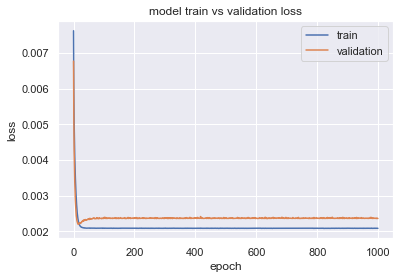

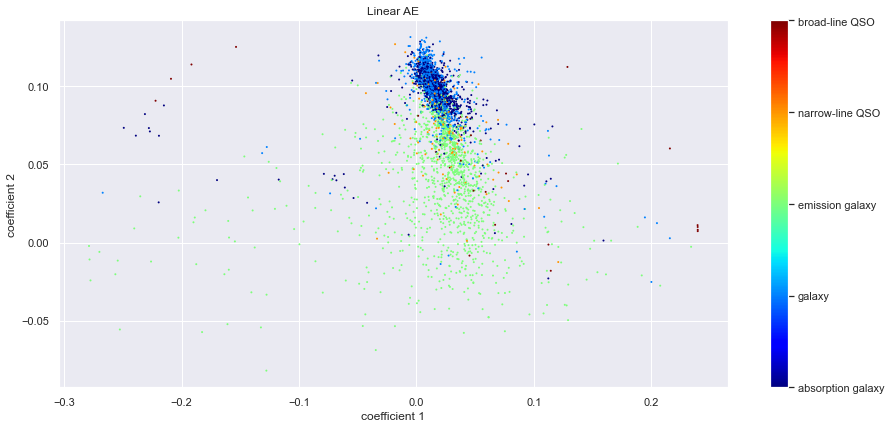

In [52]:
from keras.layers import Input
from keras.layers import Dense, Flatten, Activation
from keras.models import Model

#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
X_scaled = X_proj
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

#1000
print('Wait training...')
history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('PlotLossFALinear1000EP.png')

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:4], 'Linear AE', 'AE')

### SDSS Standard Star catalog

In [89]:
st_mass = np.load("data/sdss_S82standards_2mass.npy")

standard = np.load("data/sdss_S82standards.npy")

In [90]:
pd.DataFrame(standard).columns

Index(['RA', 'DEC', 'RArms', 'DECrms', 'Ntot', 'A_r', 'Nobs_u', 'mmed_u',
       'mmu_u', 'msig_u', 'mrms_u', 'mchi2_u', 'Nobs_g', 'mmed_g', 'mmu_g',
       'msig_g', 'mrms_g', 'mchi2_g', 'Nobs_r', 'mmed_r', 'mmu_r', 'msig_r',
       'mrms_r', 'mchi2_r', 'Nobs_i', 'mmed_i', 'mmu_i', 'msig_i', 'mrms_i',
       'mchi2_i', 'Nobs_z', 'mmed_z', 'mmu_z', 'msig_z', 'mrms_z', 'mchi2_z'],
      dtype='object')

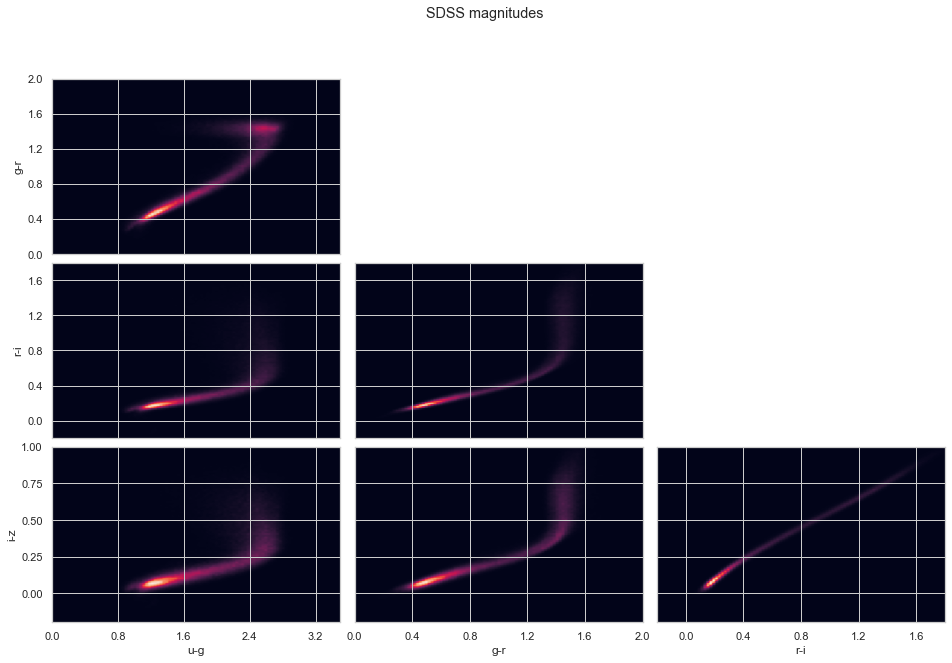

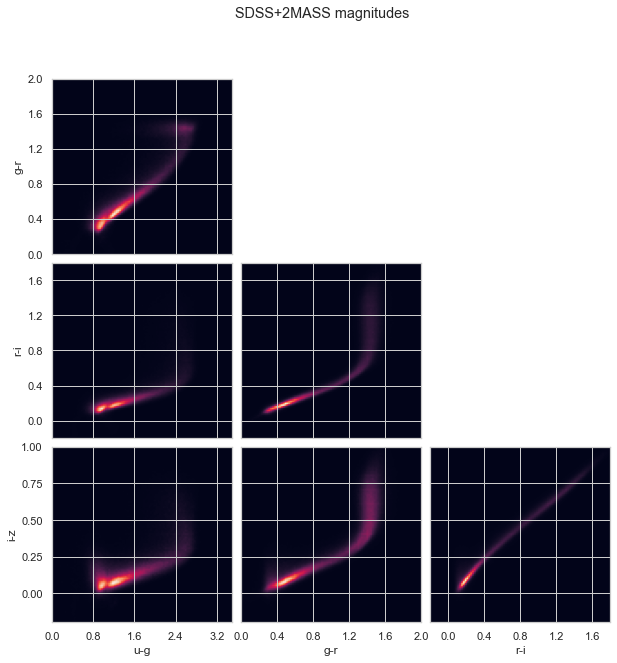

In [91]:
from astroML.plotting import MultiAxes

#------------------------------------------------------------
# Plot SDSS data alone
data = st_mass

colors = np.zeros((len(data), 4))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']

labels = ['u-g', 'g-r', 'r-i', 'i-z']

bins = [np.linspace(0.0, 3.5, 100),
        np.linspace(0, 2, 100),
        np.linspace(-0.2, 1.8, 100),
        np.linspace(-0.2, 1.0, 100)]

fig = plt.figure(figsize=(16, 10))
ax = MultiAxes(4, hspace=0.05, wspace=0.05, fig=fig)

ax.density(colors, bins=bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS magnitudes')

#------------------------------------------------------------
# Plot datacross-matched with 2MASS
data = standard

colors = np.zeros((len(data), 4))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']

labels = ['u-g', 'g-r', 'r-i', 'i-z']

bins = [np.linspace(0.0, 3.5, 100),
        np.linspace(0, 2, 100),
        np.linspace(-0.2, 1.8, 100),
        np.linspace(-0.2, 1.0, 100)]

fig = plt.figure(figsize=(10, 10))
ax = MultiAxes(4, hspace=0.05, wspace=0.05, fig=fig)

ax.density(colors, bins=bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))

fig.suptitle('SDSS+2MASS magnitudes')
plt.show()

## Photometric colors of the SDSS spectroscopic galaxy sample

In [56]:
hdulist = fits.open("data/SDSSspecgalsDR8.fit")
sp_gal = np.asarray(hdulist[1].data)

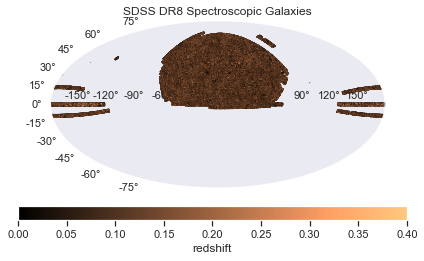

In [57]:
from astropy.visualization import hist
#------------------------------------------------------------
# plot the RA/DEC in an area-preserving projection

RA = sp_gal['ra']
DEC = sp_gal['dec']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

ax = plt.axes(projection='mollweide')

ax.grid()
plt.scatter(RA, DEC, s=1, lw=0, c=sp_gal['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)

plt.title('SDSS DR8 Spectroscopic Galaxies')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.4, 9))
cb.set_label('redshift')

Text(0, 0.5, 'rPetrosian')

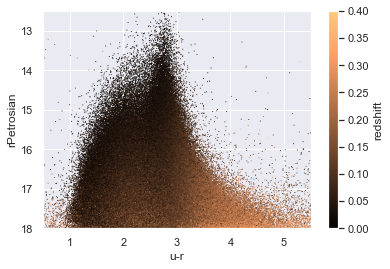

In [58]:
# plot the r vs u-r color-magnitude diagram
u = sp_gal['modelMag_u']
r = sp_gal['modelMag_r']
rPetro = sp_gal['petroMag_r']

plt.figure()
ax = plt.axes()
plt.scatter(u - r, rPetro, s=1, lw=0, c=sp_gal['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)
plt.colorbar(ticks=np.linspace(0, 0.4, 9)).set_label('redshift')

plt.xlim(0.5, 5.5)
plt.ylim(18, 12.5)

plt.xlabel('u-r')
plt.ylabel('rPetrosian')

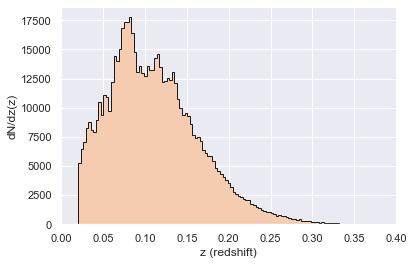

In [59]:
#------------------------------------------------------------
# plot a histogram of the redshift

plt.figure()
hist(sp_gal['z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlim(0, 0.4)
plt.xlabel('z (redshift)')
plt.ylabel('dN/dz(z)')

plt.show()

## A RR Lyrae - binary star system

In [60]:
dat = Table.read('data/RRLyrae.fit', format='fits')
rr_fit = dat.to_pandas()

In [61]:
rr_fit.head()

,__SIG2010_,Type,Per,uAmp,T0_u,gAmp,T0_g,rAmp,T0_r,iAmp,...,RAJ2000,DEJ2000,Ar,Dist,umag,gmag,rmag,imag,zmag,Vmag
0,4099,b'ab',0.641754,0.534608,51075.274714,0.563839,51075.288902,0.398326,51075.295112,0.317851,...,0.935679,1.115859,0.089,17.750000,18.134001,16.989000,16.777000,16.702999,16.684999,16.846001
1,13350,b'ab',0.547987,1.029445,54025.330112,1.093322,54025.326856,0.801720,54025.326474,0.642111,...,0.283437,1.178522,0.080,24.770000,18.839001,17.679001,17.544001,17.497000,17.500999,17.570000
2,15927,b'ab',0.612263,0.651579,53680.222485,0.697439,53680.229439,0.486554,53680.226214,0.368674,...,3.254658,-0.584066,0.090,29.120001,19.288000,18.058001,17.858999,17.792000,17.780001,17.921000
3,20406,b'ab',0.631853,0.553247,54000.280528,0.586784,54000.292109,0.426846,54000.276631,0.342734,...,3.244369,0.218891,0.088,9.130000,16.715000,15.543000,15.336000,15.286000,15.276000,15.403000
4,21992,b'ab',0.625880,1.109322,53698.245218,1.139930,53698.245256,0.849551,53698.243534,0.661144,...,4.315354,1.054582,0.077,7.350000,16.186001,15.040000,14.909000,14.864000,14.853000,14.932000


In [62]:
rr_fit.columns

Index(['__SIG2010_', 'Type', 'Per', 'uAmp', 'T0_u', 'gAmp', 'T0_g', 'rAmp',
       'T0_r', 'iAmp', 'T0_i', 'T0_z', 'RAJ2000', 'DEJ2000', 'Ar', 'Dist',
       'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Vmag'],
      dtype='object')

`The following algorithm returns the combined RR-Lyrae colors and SDSS standards colors.`

In [63]:
u_g = standard['mmu_u'] - standard['mmu_g']
g_r = standard['mmu_g'] - standard['mmu_r']
r_i = standard['mmu_r'] - standard['mmu_i']
i_z = standard['mmu_i'] - standard['mmu_z']

standard = standard[(u_g > 0.7) & (u_g < 1.35) &
                    (g_r > -0.15) & (g_r < 0.4) &
                    (r_i > -0.15) & (r_i < 0.22) &
                    (i_z > -0.21) & (i_z < 0.25)]

# ----------------------------------------------------------------------
# get magnitudes and colors; split into train and test sets

mags_rr = np.vstack([rr_fit[f + 'mag'] for f in 'ugriz'])
colors_rr = mags_rr[:-1] - mags_rr[1:]

mags_st = np.vstack([standard['mmu_' + f] for f in 'ugriz'])
colors_st = mags_st[:-1] - mags_st[1:]

# stack the two sets of colors together
X = np.vstack((colors_st.T, colors_rr.T))
y = np.zeros(X.shape[0])
y[-colors_rr.shape[1]:] = 1

`Let's look on data (how to look was taken from` [here](https://medium.com/@joshigarvit.work/rr-lyrae-star-prediction-and-analysis-of-efficiency-of-various-algorithm-a38e441d4321)

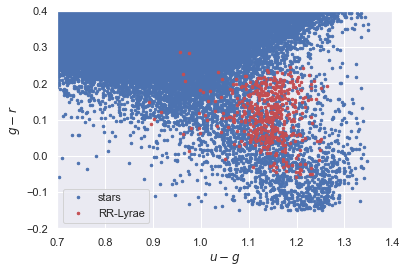

In [64]:
stars = (y == 0)
rrlyrae = (y == 1)

ax = plt.axes()
ax.plot(X[stars, 0], X[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(X[rrlyrae, 0], X[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')
ax.legend()
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(0.7, 1.4)
ax.set_ylim(-0.2, 0.4)
plt.show()

In [65]:
xd = pd.DataFrame(data=X)
yd = pd.DataFrame(data=y)

`We have various subplots explaining the distribution of photo-metric domains, that define a star in multiple distributions.`

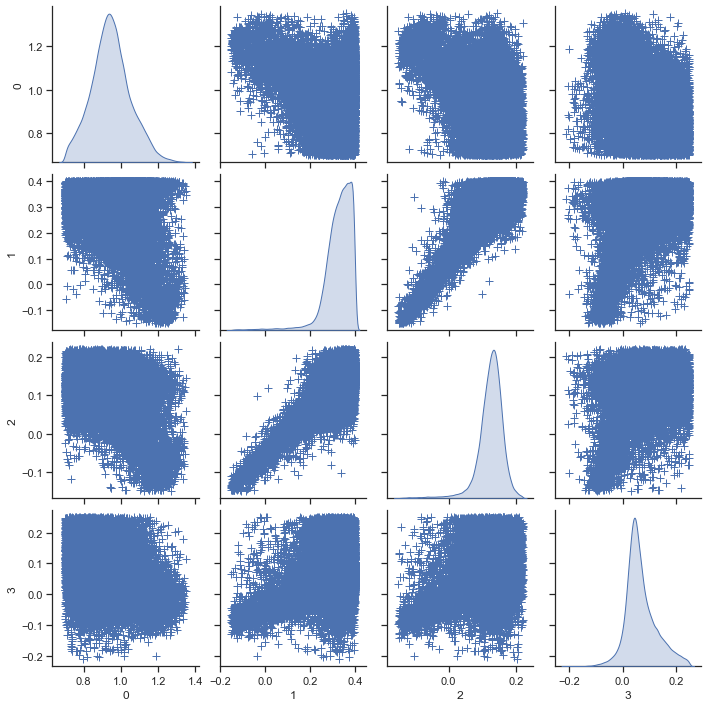

In [66]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(xd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
plt.show()

`The sample is further constrained to a smaller region of the overall color–color space following (0.7 < u − g < 1.35,−0.15 < g − r < 0.4, −0.15 < r − i < 0.22, and −0.21 < i − z < 0.25)`

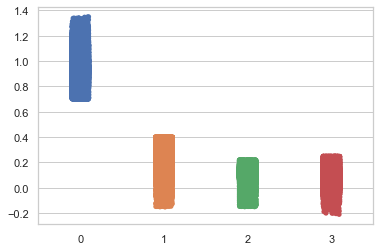

In [67]:
sns.set(style="whitegrid", color_codes=True)
sns.stripplot( data=xd, jitter=True)
plt.show()

`We can make a plot that shows the distribution of data in y this shows which category the star is`

In [68]:
yd.value_counts()

0.0    92658
1.0      483
dtype: int64

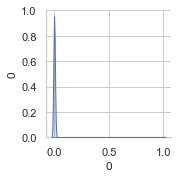

In [69]:
sns.pairplot(yd, diag_kind="kde")
plt.show()

`Now we can try to predict is it a star or RRLyrae by KNN and Desicion Tree`

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [71]:
def objective(trial):
    param = {
    "max_depth": trial.suggest_int("max_depth", 1, 30),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 6),
    "n_estimators": trial.suggest_int("n_estimators", 10, 100),
    }
    bst = RandomForestClassifier(**param)
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)
    accuracy = roc_auc_score(y_test, y_pred)
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2022-01-08 19:06:18,112] A new study created in memory with name: no-name-d2287bbb-3c0e-43a2-bd25-2b3cd8be5437
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 19:06:20,584] Trial 2 finished with value: 0.7601874077984397 and parameters: {'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'n_estimators': 27}. Best is trial 2 with value: 0.7601874077984397.
[I 2022-01-08 19:06:21,704] Trial 0 finished with value: 0.7388630475513812 and parameters: {'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'n_estimators': 43}. Best is trial 2 with value: 0.7601874077984397.
[I 2022-01-08 19:06:21,900] Trial 5 finished with value: 0.751683560371894 and parameters: {'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 4, 'n_estimators': 43}. Best is 

[I 2022-01-08 19:06:36,672] Trial 34 finished with value: 0.743114971264654 and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 44}. Best is trial 23 with value: 0.7645040731924067.
[I 2022-01-08 19:06:37,489] Trial 35 finished with value: 0.7559786452056295 and parameters: {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'n_estimators': 42}. Best is trial 23 with value: 0.7645040731924067.
[I 2022-01-08 19:06:37,602] Trial 37 finished with value: 0.7517267214923566 and parameters: {'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'n_estimators': 42}. Best is trial 23 with value: 0.7645040731924067.
[I 2022-01-08 19:06:37,658] Trial 36 finished with value: 0.7432012935055795 and parameters: {'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1, 'n_estimators': 44}. Best is trial 23 with value: 0.7645040731924067.
[I 2022-01-08 19:06:37,914] Trial 33 finished with value: 0.747431636658621 and parameter

[I 2022-01-08 19:06:49,766] Trial 68 finished with value: 0.734589543277877 and parameters: {'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 10}. Best is trial 59 with value: 0.7772166832117628.
[I 2022-01-08 19:06:50,670] Trial 71 finished with value: 0.7559139035249355 and parameters: {'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 21}. Best is trial 59 with value: 0.7772166832117628.
[I 2022-01-08 19:06:50,726] Trial 73 finished with value: 0.7645040731924067 and parameters: {'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 20}. Best is trial 59 with value: 0.7772166832117628.
[I 2022-01-08 19:06:50,886] Trial 70 finished with value: 0.7430718101441913 and parameters: {'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 27}. Best is trial 59 with value: 0.7772166832117628.
[I 2022-01-08 19:06:50,950] Trial 69 finished with value: 0.7644824926321754 and paramete

In [72]:
clf = RandomForestClassifier(**study.best_params)
clf.fit(X_train, y_train)
print("Test score:", roc_auc_score(y_test, clf.predict(X_test)))
study.best_params
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=['Stars', 'RRLyrae']))

Test score: 0.7516403992514312
              precision    recall  f1-score   support

       Stars       1.00      1.00      1.00     23169
     RRLyrae       0.72      0.50      0.59       117

    accuracy                           1.00     23286
   macro avg       0.86      0.75      0.80     23286
weighted avg       1.00      1.00      1.00     23286



In [73]:
from sklearn.neighbors import KNeighborsClassifier
def objective_knn(trial):
    param = {
    "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
    "leaf_size": trial.suggest_int("leaf_size", 10, 40),
    }
    bst = KNeighborsClassifier(**param)
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)
    accuracy = roc_auc_score(y_test, y_pred)
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective_knn, n_trials=100, n_jobs=-1)

[I 2022-01-08 19:08:37,143] A new study created in memory with name: no-name-ca4daee7-9de4-4fc5-b400-e136845e2417
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-01-08 19:08:41,952] Trial 4 finished with value: 0.7894329403457981 and parameters: {'n_neighbors': 1, 'leaf_size': 13}. Best is trial 4 with value: 0.7894329403457981.
[I 2022-01-08 19:08:43,308] Trial 0 finished with value: 0.7684970301829035 and parameters: {'n_neighbors': 5, 'leaf_size': 32}. Best is trial 4 with value: 0.7894329403457981.
[I 2022-01-08 19:08:43,396] Trial 2 finished with value: 0.7813822846841104 and parameters: {'n_neighbors': 7, 'leaf_size': 36}. Best is trial 4 with value: 0.7894329403457981.
[I 2022-01-08 19:08:45,222] Trial 3 finished with value: 0.7985842045792843 and parameters: {'n_neighbors'

[I 2022-01-08 19:09:12,786] Trial 41 finished with value: 0.7985842045792843 and parameters: {'n_neighbors': 19, 'leaf_size': 12}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:13,907] Trial 42 finished with value: 0.7985842045792843 and parameters: {'n_neighbors': 19, 'leaf_size': 13}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:15,072] Trial 43 finished with value: 0.7985842045792843 and parameters: {'n_neighbors': 19, 'leaf_size': 12}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:15,468] Trial 45 finished with value: 0.7985842045792843 and parameters: {'n_neighbors': 19, 'leaf_size': 13}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:15,532] Trial 44 finished with value: 0.7858284334394654 and parameters: {'n_neighbors': 20, 'leaf_size': 12}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:16,340] Trial 46 finished with value: 0.7858284334394654 and parameters: {'n_neighbor

[I 2022-01-08 19:09:44,801] Trial 82 finished with value: 0.7900587765925071 and parameters: {'n_neighbors': 22, 'leaf_size': 14}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:44,961] Trial 84 finished with value: 0.7900587765925071 and parameters: {'n_neighbors': 22, 'leaf_size': 16}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:46,069] Trial 87 finished with value: 0.7900587765925071 and parameters: {'n_neighbors': 22, 'leaf_size': 22}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:46,373] Trial 86 finished with value: 0.7900587765925071 and parameters: {'n_neighbors': 22, 'leaf_size': 14}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:48,130] Trial 88 finished with value: 0.8028361282925571 and parameters: {'n_neighbors': 21, 'leaf_size': 22}. Best is trial 5 with value: 0.8028361282925571.
[I 2022-01-08 19:09:49,122] Trial 91 finished with value: 0.7858284334394654 and parameters: {'n_neighbor

In [74]:
knn = KNeighborsClassifier(**study.best_params)
knn.fit(X_train, y_train)
print("Test score:", roc_auc_score(y_test, knn.predict(X_test)))
study.best_params
print(metrics.classification_report(y_test, knn.predict(X_test), target_names=['Stars', 'RRLyrae']))

Test score: 0.8028361282925571
              precision    recall  f1-score   support

       Stars       1.00      1.00      1.00     23169
     RRLyrae       0.72      0.61      0.66       117

    accuracy                           1.00     23286
   macro avg       0.86      0.80      0.83     23286
weighted avg       1.00      1.00      1.00     23286



Text(0, 0.5, 'True Positive Rate')

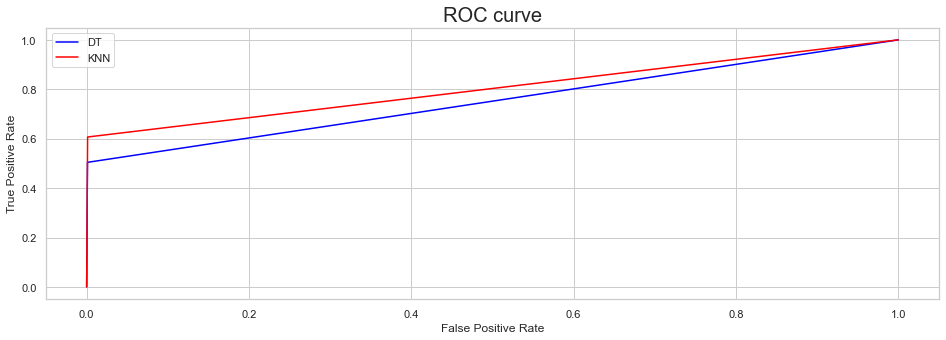

In [75]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(16, 5))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test))
plt.plot(fpr, tpr, label='DT', color='blue')

fpr, tpr, thresholds = roc_curve(y_test, knn.predict(X_test))
plt.plot(fpr, tpr, label='KNN', color='red')
plt.legend()
plt.title('ROC curve', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.set_title('ROC Curve (AUC=%.5f)' % auc(fpr, tpr))

## SDSSsspp DR9

In [76]:
dat = Table.read('data/SDSSssppDR9_rerun122.fit', format='fits')
dr = dat.to_pandas()

In [77]:
dr.head()

,ra,dec,Ar,upsf,uErr,gpsf,gErr,rpsf,rErr,ipsf,...,FeH,FeHErr,Teff,TeffErr,logg,loggErr,alphFe,alphFeErr,radVel,radVelErr
0,49.627502,-1.041756,0.200,17.618999,0.018,16.177000,0.019,15.563000,0.020,15.362000,...,-0.49078,0.030473,5480.200195,32.202000,2.7466,0.86567,0.164460,0.050000,-20.270000,1.2338
1,40.272091,-0.642501,0.085,19.240999,0.034,17.525999,0.020,16.840000,0.017,16.613001,...,-0.45424,0.074101,5166.100098,23.374001,4.4887,0.12392,0.287390,0.008659,-8.209900,1.5169
2,54.683418,0.216936,0.248,20.868999,0.094,19.573999,0.023,19.068001,0.022,18.836000,...,-0.73413,0.064500,5573.200195,74.674004,4.1013,0.10648,0.381640,0.018238,-8.852800,2.8615
3,54.776966,0.223335,0.281,19.733999,0.042,18.334999,0.022,17.663000,0.022,17.445999,...,-0.47688,0.041891,5391.299805,23.108000,4.3046,0.12903,0.224870,0.011503,-28.795000,1.2334
4,55.106388,0.219215,0.240,20.606001,0.081,19.061001,0.022,18.514999,0.022,18.301001,...,-0.44552,0.054758,5665.500000,80.054001,4.0536,0.20939,0.020483,0.016306,58.491001,3.7639


`Taken from` [here](https://github.com/astroML/astroML/blob/main/astroML/datasets/sdss_sspp.py)

In [78]:
def compute_distances(data):
    """Compute the distances to select stars in the sdss_sspp sample.

    Distance are determined using empirical color/magnitude fits from
    Ivezic et al 2008, ApJ 684:287

    Extinction correcctions come from Berry et al 2011, arXiv 1111.4985

    This distance only works for stars with log(g) > 3.3
    Other stars will have distance=-1
    """
    # extinction terms from Berry et al
    Ar = data['Ar']
    # Au = 1.810 * Ar
    Ag = 1.400 * Ar
    Ai = 0.759 * Ar
    # Az = 0.561 * Ar

    # compute corrected mags and colors
    gmag = data['gpsf'] - Ag
    rmag = data['rpsf'] - Ar
    imag = data['ipsf'] - Ai
    gi = gmag - imag

    # compute distance fit from Ivezic et al
    FeH = data['FeH']
    Mr0 = (-5.06 + 14.32 * gi - 12.97 * gi ** 2 +
           6.127 * gi ** 3 - 1.267 * gi ** 4 + 0.0967 * gi ** 5)
    FeHoffset = 4.50 - 1.11 * FeH - 0.18 * FeH ** 2
    Mr = Mr0 + FeHoffset
    dist = 0.01 * 10 ** (0.2 * (rmag - Mr))

    # stars with log(g) < 3.3 don't work for this fit: set distance to -1
    dist[data['logg'] < 3.3] = -1

    return dist

In [79]:
len(dr)

327260

Text(0.5, 1.0, 'Distance in data')

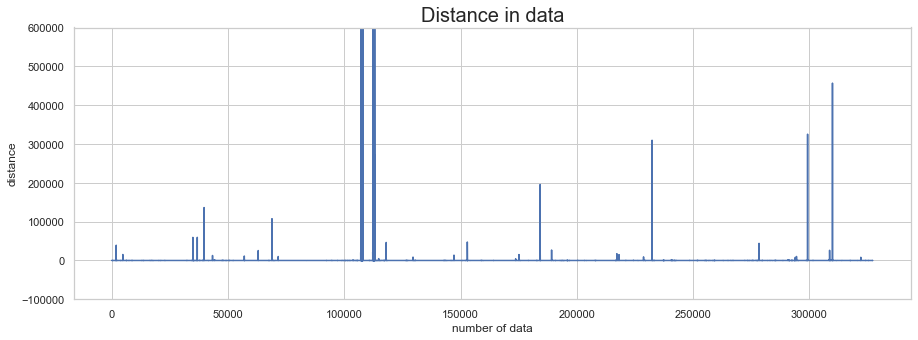

In [80]:
plt.figure(figsize=(15,5))
plt.plot(compute_distances(dr))
plt.ylim(-1e5, 0.06*1e7)
plt.ylabel('distance')
plt.xlabel('number of data')
plt.title('Distance in data', fontsize=20)

In [81]:
compute_distances(dr)

0         -1.000000
1          1.499506
2          5.409052
3          2.443516
4          4.487616
            ...    
327255    24.460767
327256     7.289697
327257     0.832492
327258     4.379960
327259     5.080984
Length: 327260, dtype: float64

Text(0.5, 1.0, 'Correlation matrix')

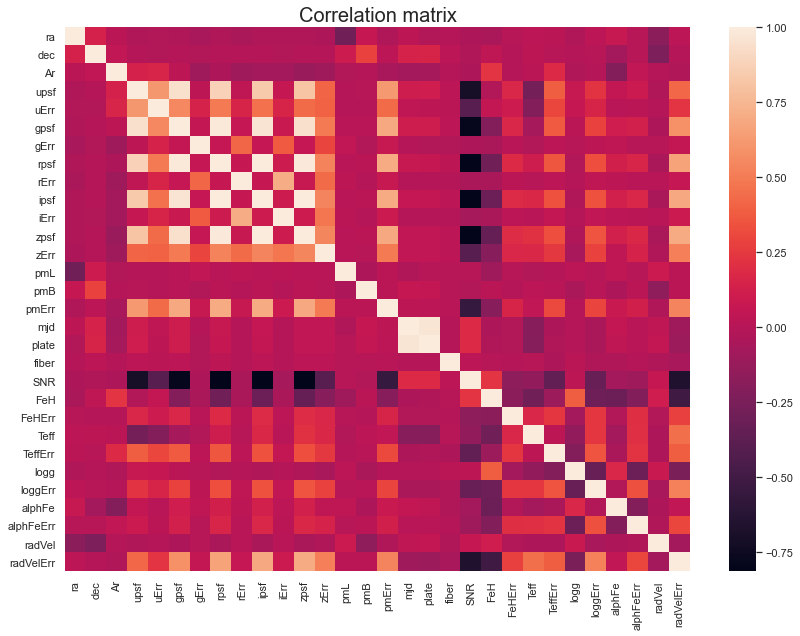

In [82]:
fig, ax = plt.subplots(figsize=(14,10))
hm = sns.heatmap(dr.corr(),
                 cbar=True,
                 annot=False, ax=ax)
hm.set_title('Correlation matrix', fontsize=20)

In [83]:
# get magnitudes and colors; split into train and test sets

psf_dr = np.vstack([dr[f + 'psf'] for f in 'ugriz'])
colors_dr = psf_dr[:-1] - psf_dr[1:]
col_dr = pd.DataFrame(colors_dr.T, columns = ['ug', 'gr', 'ri', 'iz'])

`From correlation matrix we can see, that there are no big correlations between physicals values.`

### Image

In [103]:
from astropy.table import Table
from astropy.io import fits
hdulist = fits.open("data/sgSDSSimagingSample1.fit")
image = np.asarray(hdulist[1].data)

In [122]:
data_noisy = image

# select only stars
data_noisy = image[image['type']== 6]

# Get the extinction-corrected magnitudes for each band
X = np.vstack([image[f + 'RawPSF'] for f in 'ugriz']).T
Xerr = np.vstack([image[f + 'psfErr'] for f in 'ugriz']).T